In [29]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

1. comparing the 2 datasets (JMA, ARGO) and looking at overlaps and gaps
2. creating models to find the best fit model for the JMA dataset, to use on the ARGO data 
3. use only data from JMA that corresponds to the geographic area of the ARGO dataset. 
    - do the same thing as in section 2
4. analysis of the best fit models from sections 2 and 3, to see if using data from the same geographic are results in a better model


In [30]:
infile = "jma_nitrate.csv"
######
jma_df = pd.read_csv(infile, sep = (','))

# end the cell by visualizing the data variable, if that is what you called it, example:
jma_df

,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,date,year,month,day,profile,cruise,vessel,density
0,0,25.8807,34.0215,0,0.09,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.228287
1,1,25.8993,34.0217,13,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.222695
2,2,25.8843,34.0196,27,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.225773
3,3,25.9894,34.2936,51,0.48,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.395633
4,4,23.6146,34.5002,75,2.71,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,23.263277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16216,16216,2.3991,34.4053,1204,42.96,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.334433
16217,16217,2.2752,34.4674,1403,42.88,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.394058
16218,16218,2.0916,34.5120,1602,42.20,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.444383
16219,16219,1.9582,34.5527,1801,41.73,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.487322


In [31]:
# import the jma nitrate fil, then get columns needed for training 
nitratefile = jma_df
nitratefilefiltered = nitratefile[nitratefile.nitrate>0]
X = nitratefilefiltered[["sal", "theta"]]
Y = nitratefilefiltered["nitrate"]
print(np.shape(X))
print(np.shape(Y))

#split the data set to train test 20/50 split:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=4)

(15574, 2)
(15574,)


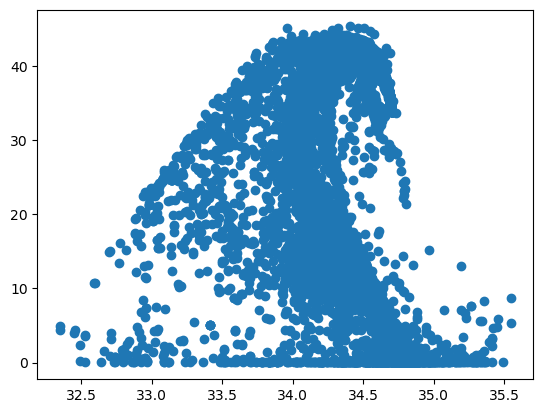

In [32]:
plt.scatter(X_train["sal"], Y_train)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

layers_saved = []
results = []
for nodes in range(7,10,1):
    for layers in range(7,10,1):
        
        layers_saved.append(nodes)

        mlp = MLPRegressor(hidden_layer_sizes=layers_saved,max_iter=500,random_state=4)
        mlp.fit(X_train, Y_train)
        trainresults = mlp.score(X_train, Y_train)
        predictions = mlp.predict(X_test)
        accuracyresults = mlp.score(X_test, Y_test)
        results = [nodes, layers, trainresults, accuracyresults]
        results.append(results)
    layers_saved = []
print(results)


c:\Users\frankee\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[9, 9, 0.9213352586464022, 0.9263302297201945, [...]]


In [34]:
import seaborn as sns
myarray = np.asarray(results)

data = pd.DataFrame({'nodes': myarray[:,0], 'layers': myarray[:,1], 'Z': myarray[:,3]})
data_pivoted = data.pivot(index='nodes', columns='layers', values='Z')
ax = sns.heatmap(data_pivoted, vmin=0.9, vmax=0.95)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.


no idea how to fix this but if continued to pop up no matter what I tried to fix...
